In [57]:
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report , confusion_matrix , accuracy_score , balanced_accuracy_score , precision_score , recall_score , brier_score_loss
from sklearn.linear_model import Perceptron
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import classification_report
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
%matplotlib inline
import matplotlib.pyplot as plt

In [46]:
# Import all algorythms used and compared
def create_perceptron(train_data, target, alpha, eta, penalty, max_iter, random_state=42):
    clf = Perceptron(random_state=random_state, eta0=eta, alpha=alpha, penalty=penalty, max_iter=max_iter) 
    clf.fit(train_data, target)
    return clf

def create_rnd_forrest(train_data, target, ccp_alpha, max_leaf, max_depth, n_estimators, random_state=42):
    clf = RandomForestClassifier(max_depth=max_depth, random_state=42, ccp_alpha=ccp_alpha, max_leaf_nodes=max_leaf, n_estimators=n_estimators)
    clf.fit(train_data, target)
    return clf

def create_nb(train_data, target, alpha):
    clf = MultinomialNB()
    clf.fit(train_data, target)
    return clf


In [101]:
# Import data and split into validation and training data
dataset_unsorted = pd.read_csv("Datasets/amazon_review_ID.shuf.lrn.csv")
headers = list(dataset_unsorted)
headers_vector = headers[1:10001] #we do not include column 0 which is the unique id.
s0 = np.sum(dataset_unsorted.iloc[:, 1:10001], axis=0) #Total count of each word/vector
mask0 = np.argsort(s0)[::-1] #sort data from most used words to fewest words
headers_sort = np.array(headers_vector)[mask0]
dataset = pd.concat([dataset_unsorted[headers_sort], dataset_unsorted["Class"]], axis=1, join='inner')

# Data set used for hold out. Result not good.
train_set, validation_set = train_test_split(dataset, test_size=0.1, random_state=42, shuffle=True)
dataset = train_set
y=dataset["Class"]

In [102]:
#Transfer dataset in multiple ways
X_names=["10000", "8000", "6000", "50:10000", "50:8000", "50:6000", "100:10000", "100:8000", "100:6000"]
X_range = [dataset.iloc[:, :10000], dataset.iloc[:, :8000], dataset.iloc[:, :6000], dataset.iloc[:, 50:10000], dataset.iloc[:, 50:8000], dataset.iloc[:, 50:6000], dataset.iloc[:,100:10000], dataset.iloc[:, 100:8000], dataset.iloc[:, 100:6000]]
X_range_ln= [np.log(dataset.iloc[:, :10000]+1), np.log(dataset.iloc[:, :8000]+1), np.log(dataset.iloc[:, :6000]+1), np.log(dataset.iloc[:, 50:10000]+1), np.log(dataset.iloc[:, 50:8000]+1), np.log(dataset.iloc[:, 50:6000]+1), np.log(dataset.iloc[:, 100:10000]+1), np.log(dataset.iloc[:, 100:8000]+1), np.log(dataset.iloc[:, 100:6000]+1)]

# Perceptron

In [5]:
# Perceptron parameters

#Base parameter setting
random_state=42
alpha = 0.0005
eta = 1
penalty='none'
max_iter=100


In [6]:
#Perceptron with hold out
import warnings
warnings.filterwarnings('ignore')
accuracy_X, accuracy_X_ln ,recall_X, recall_X_ln, precision_X, precision_X_ln, accuracy_X_train, accuracy_X_ln_train, recall_X_train,recall_X_ln_train, precision_X_train, precision_X_ln_train = [], [], [], [], [], [], [], [], [],[], [], []
#accuracy_model, precision_model, recall_model, accuracy_model_train, precision_model_train, recall_model_train = [], [], [], [],[], []
for X in X_range:
    X_target=pd.concat([X, dataset["Class"]], axis=1, join='inner')
    train_set, test_set = train_test_split(X_target, test_size=0.2, random_state=42, shuffle=True)
    X_test = test_set.iloc[:,:-1]
    y_test = test_set["Class"]
    X_train = train_set.iloc[:,:-1]
    y_train =train_set["Class"]
    
    model = create_perceptron(X_train, y_train, alpha, eta, penalty, max_iter, random_state=42)
    # Append to accuracy_model the accuracy of the model
    accuracy_X.append(accuracy_score(y_test, model.predict(X_test), normalize=True) * 100)
    precision_X.append(precision_score(y_test, model.predict(X_test), average="macro") * 100)
    recall_X.append(recall_score(y_test, model.predict(X_test), average="macro") * 100)
    accuracy_X_train.append(accuracy_score(y_train, model.predict(X_train), normalize=True) * 100)
    precision_X_train.append(precision_score(y_train, model.predict(X_train), average="macro") * 100)
    recall_X_train.append(recall_score(y_train, model.predict(X_train), average="macro") * 100)
    
for X in X_range_ln:
    X_target=pd.concat([X, dataset["Class"]], axis=1, join='inner')
    train_set, test_set = train_test_split(X_target, test_size=0.2, random_state=42, shuffle=True)
    X_test = test_set.iloc[:,:-1]
    y_test = test_set["Class"]
    X_train = train_set.iloc[:,:-1]
    y_train =train_set["Class"]
    
    model = create_perceptron(X_train, y_train, alpha, eta, penalty, max_iter, random_state=42)
    # Append to accuracy_model the accuracy of the model
    accuracy_X_ln.append(accuracy_score(y_test, model.predict(X_test), normalize=True) * 100)
    precision_X_ln.append(precision_score(y_test, model.predict(X_test), average="macro") * 100)
    recall_X_ln.append(recall_score(y_test, model.predict(X_test), average="macro") * 100)
    accuracy_X_ln_train.append(accuracy_score(y_train, model.predict(X_train), normalize=True) * 100)
    precision_X_ln_train.append(precision_score(y_train, model.predict(X_train), average="macro") * 100)
    recall_X_ln_train.append(recall_score(y_train, model.predict(X_train), average="macro") * 100)

Accuracy_matrix = {'Scenario': X_names, "Basic test": accuracy_X, "Basic train": accuracy_X_train, "LN test": accuracy_X_ln, "LN train": accuracy_X_ln_train}
Recall_matrix = {'Scenario': X_names, "Basic test": recall_X, "Basic train": recall_X_train, "LN test": recall_X_ln, "LN train": recall_X_ln_train}
Precision_matrix = {'Scenario': X_names, "Basic test": precision_X, "Basic train": precision_X_train, "LN test": precision_X_ln, "LN train": precision_X_ln_train}
pd.DataFrame(Accuracy_matrix).to_csv("Perceptron__hold_out_accuracy.csv")
pd.DataFrame(Precision_matrix).to_csv("Perceptron_hold_out_precision.csv")
pd.DataFrame(Recall_matrix).to_csv("Perceptron_hold_out_recall.csv")

print(pd.DataFrame(Accuracy_matrix).to_latex())
print(pd.DataFrame(Recall_matrix).to_latex())
print(pd.DataFrame(Precision_matrix).to_latex())

\begin{tabular}{llrrrr}
\toprule
{} &   Scenario &  Basic test &  Basic train &    LN test &  LN train \\
\midrule
0 &      10000 &   30.000000 &    93.666667 &  44.666667 &     100.0 \\
1 &       8000 &   29.333333 &    93.666667 &  44.000000 &     100.0 \\
2 &       6000 &   31.333333 &    93.166667 &  46.000000 &     100.0 \\
3 &   50:10000 &   40.666667 &   100.000000 &  46.000000 &     100.0 \\
4 &    50:8000 &   42.000000 &   100.000000 &  48.000000 &     100.0 \\
5 &    50:6000 &   42.666667 &   100.000000 &  42.666667 &     100.0 \\
6 &  100:10000 &   43.333333 &   100.000000 &  39.333333 &     100.0 \\
7 &   100:8000 &   44.000000 &   100.000000 &  40.666667 &     100.0 \\
8 &   100:6000 &   43.333333 &   100.000000 &  36.666667 &     100.0 \\
\bottomrule
\end{tabular}

\begin{tabular}{llrrrr}
\toprule
{} &   Scenario &  Basic test &  Basic train &    LN test &  LN train \\
\midrule
0 &      10000 &   33.159722 &    93.490686 &  46.894630 &     100.0 \\
1 &       8000 &   32.6

In [7]:
#Perceptron with cross validation
import warnings
warnings.filterwarnings('ignore')
accuracy_X, accuracy_X_ln ,recall_X, recall_X_ln, precision_X, precision_X_ln, accuracy_X_train, accuracy_X_ln_train, recall_X_train,recall_X_ln_train, precision_X_train, precision_X_ln_train = [], [], [], [], [], [], [], [], [],[], [], []

for X in X_range:
    kf = KFold(n_splits=10, shuffle=True, random_state=42)
    kf.split(X)

    # Initialize the accuracy of the models to blank list. The accuracy of each model will be appended to this list

    accuracy_model, precision_model, recall_model, accuracy_model_train, precision_model_train, recall_model_train = [], [], [], [],[], []
    for train_index, test_index in kf.split(X):
        # Split train-test
        X_train, X_test = X.iloc[train_index], X.iloc[test_index]
        y_train, y_test = y[train_index], y[test_index]
        # Train the model
        model = create_perceptron(X_train, y_train, alpha, eta, penalty, max_iter, random_state=42)
        # Append to accuracy_model the accuracy of the model
        accuracy_model.append(accuracy_score(y_test, model.predict(X_test), normalize=True) * 100)
        precision_model.append(precision_score(y_test, model.predict(X_test), average="macro") * 100)
        recall_model.append(recall_score(y_test, model.predict(X_test), average="macro") * 100)
        accuracy_model_train.append(accuracy_score(y_train, model.predict(X_train), normalize=True) * 100)
        precision_model_train.append(precision_score(y_train, model.predict(X_train), average="macro") * 100)
        recall_model_train.append(recall_score(y_train, model.predict(X_train), average="macro") * 100)
    accuracy_X.append(np.mean(accuracy_model))
    precision_X.append(np.mean(precision_model))
    recall_X.append(np.mean(recall_model))
    accuracy_X_train.append(np.mean(accuracy_model_train))
    precision_X_train.append(np.mean(precision_model_train))
    recall_X_train.append(np.mean(recall_model_train))



for X in X_range_ln:
    kf = KFold(n_splits=10, shuffle=True, random_state=42)
    kf.split(X)

    # Initialize the accuracy of the models to blank list. The accuracy of each model will be appended to this list
    accuracy_model, precision_model, recall_model, accuracy_model_train, precision_model_train, recall_model_train = [], [], [], [],[], []

    for train_index, test_index in kf.split(X):
        # Split train-test
        X_train, X_test = X.iloc[train_index], X.iloc[test_index]
        y_train, y_test = y[train_index], y[test_index]
        # Train the model
        model =create_perceptron(X_train, y_train, alpha, eta, penalty, max_iter, random_state=42)
        # Append to accuracy_model the accuracy of the model
        accuracy_model.append(accuracy_score(y_test, model.predict(X_test), normalize=True) * 100)
        precision_model.append(precision_score(y_test, model.predict(X_test), average="macro") * 100)
        recall_model.append(recall_score(y_test, model.predict(X_test), average="macro") * 100)
        accuracy_model_train.append(accuracy_score(y_train, model.predict(X_train), normalize=True) * 100)
        precision_model_train.append(precision_score(y_train, model.predict(X_train), average="macro") * 100)
        recall_model_train.append(recall_score(y_train, model.predict(X_train), average="macro") * 100)
    accuracy_X_ln.append(np.mean(accuracy_model))
    precision_X_ln.append(np.mean(precision_model))
    recall_X_ln.append(np.mean(recall_model))
    accuracy_X_ln_train.append(np.mean(accuracy_model_train))
    precision_X_ln_train.append(np.mean(precision_model_train))
    recall_X_ln_train.append(np.mean(recall_model_train))

Accuracy_matrix = {'Scenario': X_names, "Basic test": accuracy_X, "Basic train": accuracy_X_train, "LN test": accuracy_X_ln, "LN train": accuracy_X_ln_train}
Recall_matrix = {'Scenario': X_names, "Basic test": recall_X, "Basic train": recall_X_train, "LN test": recall_X_ln, "LN train": recall_X_ln_train}
Precision_matrix = {'Scenario': X_names, "Basic test": precision_X, "Basic train": precision_X_train, "LN test": precision_X_ln, "LN train": precision_X_ln_train}
pd.DataFrame(Accuracy_matrix).to_csv("Perceptron_CV_accuracy.csv")
pd.DataFrame(Precision_matrix).to_csv("Perceptron_CV_precision.csv")
pd.DataFrame(Recall_matrix).to_csv("Perceptron_CV_recall.csv")

print(pd.DataFrame(Accuracy_matrix).to_latex())
print(pd.DataFrame(Recall_matrix).to_latex())
print(pd.DataFrame(Precision_matrix).to_latex())

\begin{tabular}{llrrrr}
\toprule
{} &   Scenario &  Basic test &  Basic train &    LN test &  LN train \\
\midrule
0 &      10000 &   40.133333 &    93.229630 &  50.133333 &     100.0 \\
1 &       8000 &   40.000000 &    93.585185 &  50.266667 &     100.0 \\
2 &       6000 &   39.466667 &    92.340741 &  51.200000 &     100.0 \\
3 &   50:10000 &   51.600000 &   100.000000 &  50.666667 &     100.0 \\
4 &    50:8000 &   51.200000 &   100.000000 &  50.266667 &     100.0 \\
5 &    50:6000 &   49.066667 &   100.000000 &  50.400000 &     100.0 \\
6 &  100:10000 &   50.800000 &   100.000000 &  49.333333 &     100.0 \\
7 &   100:8000 &   50.533333 &   100.000000 &  50.133333 &     100.0 \\
8 &   100:6000 &   50.266667 &   100.000000 &  48.933333 &     100.0 \\
\bottomrule
\end{tabular}

\begin{tabular}{llrrrr}
\toprule
{} &   Scenario &  Basic test &  Basic train &    LN test &  LN train \\
\midrule
0 &      10000 &   36.938562 &    93.206909 &  47.373989 &     100.0 \\
1 &       8000 &   36.7

In [8]:
#Perceptron with cross validation
import warnings
warnings.filterwarnings('ignore')
accuracy_X, accuracy_X_ln ,recall_X, recall_X_ln, precision_X, precision_X_ln, accuracy_X_train, accuracy_X_ln_train, recall_X_train,recall_X_ln_train, precision_X_train, precision_X_ln_train = [], [], [], [], [], [], [], [], [],[], [], []

for X in X_range:
    kf = KFold(n_splits=10, shuffle=True, random_state=42)
    kf.split(X)

    # Initialize the accuracy of the models to blank list. The accuracy of each model will be appended to this list

    accuracy_model, precision_model, recall_model, accuracy_model_train, precision_model_train, recall_model_train = [], [], [], [],[], []
    for train_index, test_index in kf.split(X):
        # Split train-test
        X_train, X_test = X.iloc[train_index], X.iloc[test_index]
        y_train, y_test = y[train_index], y[test_index]
        # Train the model
        model = create_perceptron(X_train, y_train, alpha, eta, penalty, max_iter, random_state=42)
        # Append to accuracy_model the accuracy of the model
        accuracy_model.append(accuracy_score(y_test, model.predict(X_test), normalize=True) * 100)
        precision_model.append(precision_score(y_test, model.predict(X_test), average="macro") * 100)
        recall_model.append(recall_score(y_test, model.predict(X_test), average="macro") * 100)
        accuracy_model_train.append(accuracy_score(y_train, model.predict(X_train), normalize=True) * 100)
        precision_model_train.append(precision_score(y_train, model.predict(X_train), average="macro") * 100)
        recall_model_train.append(recall_score(y_train, model.predict(X_train), average="macro") * 100)
    accuracy_X.append(np.mean(accuracy_model))
    precision_X.append(np.mean(precision_model))
    recall_X.append(np.mean(recall_model))
    accuracy_X_train.append(np.mean(accuracy_model_train))
    precision_X_train.append(np.mean(precision_model_train))
    recall_X_train.append(np.mean(recall_model_train))



for X in X_range_ln:
    kf = KFold(n_splits=10, shuffle=True, random_state=42)
    kf.split(X)

    # Initialize the accuracy of the models to blank list. The accuracy of each model will be appended to this list
    accuracy_model, precision_model, recall_model, accuracy_model_train, precision_model_train, recall_model_train = [], [], [], [],[], []

    for train_index, test_index in kf.split(X):
        # Split train-test
        X_train, X_test = X.iloc[train_index], X.iloc[test_index]
        y_train, y_test = y[train_index], y[test_index]
        # Train the model
        model = create_perceptron(X_train, y_train, alpha, eta, penalty, max_iter, random_state=42)
        # Append to accuracy_model the accuracy of the model
        accuracy_model.append(accuracy_score(y_test, model.predict(X_test), normalize=True) * 100)
        precision_model.append(precision_score(y_test, model.predict(X_test), average="macro") * 100)
        recall_model.append(recall_score(y_test, model.predict(X_test), average="macro") * 100)
        accuracy_model_train.append(accuracy_score(y_train, model.predict(X_train), normalize=True) * 100)
        precision_model_train.append(precision_score(y_train, model.predict(X_train), average="macro") * 100)
        recall_model_train.append(recall_score(y_train, model.predict(X_train), average="macro") * 100)
    accuracy_X_ln.append(np.mean(accuracy_model))
    precision_X_ln.append(np.mean(precision_model))
    recall_X_ln.append(np.mean(recall_model))
    accuracy_X_ln_train.append(np.mean(accuracy_model_train))
    precision_X_ln_train.append(np.mean(precision_model_train))
    recall_X_ln_train.append(np.mean(recall_model_train))

Accuracy_matrix = {'Scenario': X_names, "Basic test": accuracy_X, "Basic train": accuracy_X_train, "LN test": accuracy_X_ln, "LN train": accuracy_X_ln_train}
Recall_matrix = {'Scenario': X_names, "Basic test": recall_X, "Basic train": recall_X_train, "LN test": recall_X_ln, "LN train": recall_X_ln_train}
Precision_matrix = {'Scenario': X_names, "Basic test": precision_X, "Basic train": precision_X_train, "LN test": precision_X_ln, "LN train": precision_X_ln_train}
pd.DataFrame(Accuracy_matrix).to_csv("Perceptron_CV_accuracy.csv")
pd.DataFrame(Precision_matrix).to_csv("Perceptron_CV_precision.csv")
pd.DataFrame(Recall_matrix).to_csv("Perceptron_CV_recall.csv")
print("The accuracy matrix is", Accuracy_matrix)
print("The recall matrix is", Recall_matrix)
print("The precision matrix is",  Precision_matrix)
#print(pd.DataFrame(Accuracy_matrix.to_latex()))
#print(pd.DataFrame(Recall_matrix.to_latex()))
#print(pd.DataFrame(Precision_matrix-to_latex()))

The accuracy matrix is {'Scenario': ['10000', '8000', '6000', '50:10000', '50:8000', '50:6000', '100:10000', '100:8000', '100:6000'], 'Basic test': [40.13333333333334, 40.0, 39.46666666666667, 51.6, 51.2, 49.06666666666666, 50.8, 50.53333333333334, 50.26666666666667], 'Basic train': [93.22962962962961, 93.58518518518518, 92.34074074074074, 100.0, 100.0, 100.0, 100.0, 100.0, 100.0], 'LN test': [50.13333333333333, 50.266666666666666, 51.2, 50.66666666666667, 50.266666666666666, 50.4, 49.333333333333336, 50.13333333333334, 48.93333333333334], 'LN train': [100.0, 100.0, 100.0, 100.0, 100.0, 100.0, 100.0, 100.0, 100.0]}
The recall matrix is {'Scenario': ['10000', '8000', '6000', '50:10000', '50:8000', '50:6000', '100:10000', '100:8000', '100:6000'], 'Basic test': [36.938561929263145, 36.79176957301958, 36.91699310617544, 49.430977879944564, 49.003492056196805, 47.34262498352488, 48.026543566533455, 48.203291345493064, 47.64504310523016], 'Basic train': [93.20690912029148, 93.58526148687913,

In [9]:
print(pd.DataFrame(Accuracy_matrix).to_latex())
print(pd.DataFrame(Recall_matrix).to_latex())
print(pd.DataFrame(Precision_matrix).to_latex())

\begin{tabular}{llrrrr}
\toprule
{} &   Scenario &  Basic test &  Basic train &    LN test &  LN train \\
\midrule
0 &      10000 &   40.133333 &    93.229630 &  50.133333 &     100.0 \\
1 &       8000 &   40.000000 &    93.585185 &  50.266667 &     100.0 \\
2 &       6000 &   39.466667 &    92.340741 &  51.200000 &     100.0 \\
3 &   50:10000 &   51.600000 &   100.000000 &  50.666667 &     100.0 \\
4 &    50:8000 &   51.200000 &   100.000000 &  50.266667 &     100.0 \\
5 &    50:6000 &   49.066667 &   100.000000 &  50.400000 &     100.0 \\
6 &  100:10000 &   50.800000 &   100.000000 &  49.333333 &     100.0 \\
7 &   100:8000 &   50.533333 &   100.000000 &  50.133333 &     100.0 \\
8 &   100:6000 &   50.266667 &   100.000000 &  48.933333 &     100.0 \\
\bottomrule
\end{tabular}

\begin{tabular}{llrrrr}
\toprule
{} &   Scenario &  Basic test &  Basic train &    LN test &  LN train \\
\midrule
0 &      10000 &   36.938562 &    93.206909 &  47.373989 &     100.0 \\
1 &       8000 &   36.7

In [10]:
#Learning rate
import warnings
warnings.filterwarnings('ignore')
accuracy_X, accuracy_X_ln ,recall_X, recall_X_ln, precision_X, precision_X_ln, accuracy_X_train, accuracy_X_ln_train, recall_X_train,recall_X_ln_train, precision_X_train, precision_X_ln_train = [], [], [], [], [], [], [], [], [],[], [], []

eta_range=[1e-4, 1e-3, 0.01, 0.1, 0.2, 0.3, 0.4, 0.6, 0.8, 1]
X = np.log(dataset.iloc[:, 50:8000]+1)

kf = KFold(n_splits=10, shuffle=True, random_state=42)
kf.split(X)

for eta in eta_range:
# Initialize the accuracy of the models to blank list. The accuracy of each model will be appended to this list

    accuracy_model, precision_model, recall_model, accuracy_model_train, precision_model_train, recall_model_train = [], [], [], [],[], []
    for train_index, test_index in kf.split(X):
        # Split train-test
        X_train, X_test = X.iloc[train_index], X.iloc[test_index]
        y_train, y_test = y[train_index], y[test_index]
        # Train the model
        model = create_perceptron(X_train, y_train, alpha, eta, penalty, max_iter, random_state=42)
        # Append to accuracy_model the accuracy of the model
        accuracy_model.append(accuracy_score(y_test, model.predict(X_test), normalize=True) * 100)
        precision_model.append(precision_score(y_test, model.predict(X_test), average="macro") * 100)
        recall_model.append(recall_score(y_test, model.predict(X_test), average="macro") * 100)
        accuracy_model_train.append(accuracy_score(y_train, model.predict(X_train), normalize=True) * 100)
        precision_model_train.append(precision_score(y_train, model.predict(X_train), average="macro") * 100)
        recall_model_train.append(recall_score(y_train, model.predict(X_train), average="macro") * 100)
    accuracy_X.append(np.mean(accuracy_model))
    precision_X.append(np.mean(precision_model))
    recall_X.append(np.mean(recall_model))
    accuracy_X_train.append(np.mean(accuracy_model_train))
    precision_X_train.append(np.mean(precision_model_train))
    recall_X_train.append(np.mean(recall_model_train))
    
Accuracy_matrix_Eta = {'Scenario': eta_range, "Basic test": accuracy_X, "Basic train": accuracy_X_train}
Recall_matrix_Eta = {'Scenario': eta_range, "Basic test": recall_X, "Basic train": recall_X_train}
Precision_matrix_Eta = {'Scenario': eta_range, "Basic test": precision_X, "Basic train": precision_X_train}
pd.DataFrame(Accuracy_matrix_Eta).to_csv("Perceptron_CV_Eta_accuracy.csv")
pd.DataFrame(Precision_matrix_Eta).to_csv("Perceptron_CV_Eta_precision.csv")
pd.DataFrame(Recall_matrix_Eta).to_csv("Perceptron_CV_Etarecall.csv")

print(pd.DataFrame(Accuracy_matrix_Eta).to_latex())
print(pd.DataFrame(Recall_matrix_Eta).to_latex())
print(pd.DataFrame(Precision_matrix_Eta).to_latex())

\begin{tabular}{lrrr}
\toprule
{} &  Scenario &  Basic test &  Basic train \\
\midrule
0 &    0.0001 &   50.266667 &        100.0 \\
1 &    0.0010 &   50.266667 &        100.0 \\
2 &    0.0100 &   50.266667 &        100.0 \\
3 &    0.1000 &   50.266667 &        100.0 \\
4 &    0.2000 &   50.266667 &        100.0 \\
5 &    0.3000 &   50.266667 &        100.0 \\
6 &    0.4000 &   50.266667 &        100.0 \\
7 &    0.6000 &   50.266667 &        100.0 \\
8 &    0.8000 &   50.266667 &        100.0 \\
9 &    1.0000 &   50.266667 &        100.0 \\
\bottomrule
\end{tabular}

\begin{tabular}{lrrr}
\toprule
{} &  Scenario &  Basic test &  Basic train \\
\midrule
0 &    0.0001 &   47.726687 &        100.0 \\
1 &    0.0010 &   47.726687 &        100.0 \\
2 &    0.0100 &   47.726687 &        100.0 \\
3 &    0.1000 &   47.726687 &        100.0 \\
4 &    0.2000 &   47.726687 &        100.0 \\
5 &    0.3000 &   47.726687 &        100.0 \\
6 &    0.4000 &   47.726687 &        100.0 \\
7 &    0.6000 &  

In [11]:
print(pd.DataFrame(Accuracy_matrix_Eta).to_latex())
print(pd.DataFrame(Recall_matrix_Eta).to_latex())
print(pd.DataFrame(Precision_matrix_Eta).to_latex())

\begin{tabular}{lrrr}
\toprule
{} &  Scenario &  Basic test &  Basic train \\
\midrule
0 &    0.0001 &   50.266667 &        100.0 \\
1 &    0.0010 &   50.266667 &        100.0 \\
2 &    0.0100 &   50.266667 &        100.0 \\
3 &    0.1000 &   50.266667 &        100.0 \\
4 &    0.2000 &   50.266667 &        100.0 \\
5 &    0.3000 &   50.266667 &        100.0 \\
6 &    0.4000 &   50.266667 &        100.0 \\
7 &    0.6000 &   50.266667 &        100.0 \\
8 &    0.8000 &   50.266667 &        100.0 \\
9 &    1.0000 &   50.266667 &        100.0 \\
\bottomrule
\end{tabular}

\begin{tabular}{lrrr}
\toprule
{} &  Scenario &  Basic test &  Basic train \\
\midrule
0 &    0.0001 &   47.726687 &        100.0 \\
1 &    0.0010 &   47.726687 &        100.0 \\
2 &    0.0100 &   47.726687 &        100.0 \\
3 &    0.1000 &   47.726687 &        100.0 \\
4 &    0.2000 &   47.726687 &        100.0 \\
5 &    0.3000 &   47.726687 &        100.0 \\
6 &    0.4000 &   47.726687 &        100.0 \\
7 &    0.6000 &  

In [12]:
import warnings
warnings.filterwarnings('ignore')

#Max iterations
#Base parameter setting
alpha = 0.0005
eta = 1
penalty='none'
random_state=42


#Learning rate
import warnings
warnings.filterwarnings('ignore')
accuracy_X, accuracy_X_ln ,recall_X, recall_X_ln, precision_X, precision_X_ln, accuracy_X_train, accuracy_X_ln_train, recall_X_train,recall_X_ln_train, precision_X_train, precision_X_ln_train = [], [], [], [], [], [], [], [], [],[], [], []

max_iter_range=[5, 10, 50, 100, 200 ]
X = np.log(dataset.iloc[:, 50:8000]+1)
kf = KFold(n_splits=10, shuffle=True, random_state=42)
kf.split(X)

for max_iter in max_iter_range:
# Initialize the accuracy of the models to blank list. The accuracy of each model will be appended to this list

    accuracy_model, precision_model, recall_model, accuracy_model_train, precision_model_train, recall_model_train = [], [], [], [],[], []
    for train_index, test_index in kf.split(X):
        # Split train-test
        X_train, X_test = X.iloc[train_index], X.iloc[test_index]
        y_train, y_test = y[train_index], y[test_index]
        # Train the model
        model = create_perceptron(X_train, y_train, alpha, eta, penalty, max_iter, random_state=42)
        # Append to accuracy_model the accuracy of the model
        accuracy_model.append(accuracy_score(y_test, model.predict(X_test), normalize=True) * 100)
        precision_model.append(precision_score(y_test, model.predict(X_test), average="macro") * 100)
        recall_model.append(recall_score(y_test, model.predict(X_test), average="macro") * 100)
        accuracy_model_train.append(accuracy_score(y_train, model.predict(X_train), normalize=True) * 100)
        precision_model_train.append(precision_score(y_train, model.predict(X_train), average="macro") * 100)
        recall_model_train.append(recall_score(y_train, model.predict(X_train), average="macro") * 100)
    accuracy_X.append(np.mean(accuracy_model))
    precision_X.append(np.mean(precision_model))
    recall_X.append(np.mean(recall_model))
    accuracy_X_train.append(np.mean(accuracy_model_train))
    precision_X_train.append(np.mean(precision_model_train))
    recall_X_train.append(np.mean(recall_model_train))
    
Accuracy_matrix_maxiter = {'Scenario': max_iter_range, "Basic test": accuracy_X, "Basic train": accuracy_X_train}
Recall_matrix_maxiter = {'Scenario': max_iter_range, "Basic test": recall_X, "Basic train": recall_X_train}
Precision_matrix_maxiter = {'Scenario': max_iter_range, "Basic test": precision_X, "Basic train": precision_X_train}
pd.DataFrame(Accuracy_matrix_maxiter).to_csv("Perceptron_CV_maxiter_accuracy.csv")
pd.DataFrame(Precision_matrix_maxiter).to_csv("Perceptron_CV_maxiter_precision.csv")
pd.DataFrame(Recall_matrix_maxiter).to_csv("Perceptron_CV_maxiter_recall.csv")

In [13]:
print(pd.DataFrame(Accuracy_matrix_maxiter).to_latex())
print(pd.DataFrame(Recall_matrix_maxiter).to_latex())
print(pd.DataFrame(Precision_matrix_maxiter).to_latex())

\begin{tabular}{lrrr}
\toprule
{} &  Scenario &  Basic test &  Basic train \\
\midrule
0 &         5 &   50.400000 &    99.955556 \\
1 &        10 &   50.266667 &   100.000000 \\
2 &        50 &   50.266667 &   100.000000 \\
3 &       100 &   50.266667 &   100.000000 \\
4 &       200 &   50.266667 &   100.000000 \\
\bottomrule
\end{tabular}

\begin{tabular}{lrrr}
\toprule
{} &  Scenario &  Basic test &  Basic train \\
\midrule
0 &         5 &   48.177531 &      99.9625 \\
1 &        10 &   47.726687 &     100.0000 \\
2 &        50 &   47.726687 &     100.0000 \\
3 &       100 &   47.726687 &     100.0000 \\
4 &       200 &   47.726687 &     100.0000 \\
\bottomrule
\end{tabular}

\begin{tabular}{lrrr}
\toprule
{} &  Scenario &  Basic test &  Basic train \\
\midrule
0 &         5 &   47.964127 &    99.956818 \\
1 &        10 &   47.542263 &   100.000000 \\
2 &        50 &   47.542263 &   100.000000 \\
3 &       100 &   47.542263 &   100.000000 \\
4 &       200 &   47.542263 &   100.00000

In [103]:
accuracy_model=[]
X = np.log(dataset.iloc[:, 50:8000]+1)
model = create_perceptron(X, dataset["Class"], 0.0005, 1, 'none', 5, random_state=42)
# Append to accuracy_model the accuracy of the model
accuracy_model=(accuracy_score(validation_set["Class"], model.predict(np.log(validation_set.iloc[:, 50:8000]+1)), normalize=True) * 100)
#precision_model=(precision_score(validation_set["Class"],model.predict(p.log(validation_set.iloc[:, 50:8000]+1), average="macro") * 100)
#recall_model=(recall_score(validation_set["Class"], model.predict(np.log(validation_set.iloc[:,50:8000]+1), average="macro") * 100)
#accuracy_X=(np.mean(accuracy_model))
print(accuracy_model)
#print("Accuracy is", accuracy_model, "precision is:", precision_model, "Recall is:", recall_model)

45.33333333333333


# Random forrest

In [14]:
# Random forrest parameters

#Base parameter setting
ccp_alpha = 0
max_leaf = 50
max_depth = 10
n_estimators = 100

In [15]:
import warnings
warnings.filterwarnings('ignore')
accuracy_X, accuracy_X_ln ,recall_X, recall_X_ln, precision_X, precision_X_ln, accuracy_X_train, accuracy_X_ln_train, recall_X_train,recall_X_ln_train, precision_X_train, precision_X_ln_train = [], [], [], [], [], [], [], [], [],[], [], []
#accuracy_model, precision_model, recall_model, accuracy_model_train, precision_model_train, recall_model_train = [], [], [], [],[], []
for X in X_range:
    X_target=pd.concat([X, dataset["Class"]], axis=1, join='inner')
    train_set, test_set = train_test_split(X_target, test_size=0.2, random_state=42, shuffle=True)
    X_test = test_set.iloc[:,:-1]
    y_test = test_set["Class"]
    X_train = train_set.iloc[:,:-1]
    y_train =train_set["Class"]
    
    model = create_rnd_forrest(X_train, y_train, ccp_alpha, max_leaf, max_depth, n_estimators, random_state=42)
    # Append to accuracy_model the accuracy of the model
    accuracy_X.append(accuracy_score(y_test, model.predict(X_test), normalize=True) * 100)
    precision_X.append(precision_score(y_test, model.predict(X_test), average="macro") * 100)
    recall_X.append(recall_score(y_test, model.predict(X_test), average="macro") * 100)
    accuracy_X_train.append(accuracy_score(y_train, model.predict(X_train), normalize=True) * 100)
    precision_X_train.append(precision_score(y_train, model.predict(X_train), average="macro") * 100)
    recall_X_train.append(recall_score(y_train, model.predict(X_train), average="macro") * 100)
    
for X in X_range_ln:
    X_target=pd.concat([X, dataset["Class"]], axis=1, join='inner')
    train_set, test_set = train_test_split(X_target, test_size=0.2, random_state=42, shuffle=True)
    X_test = test_set.iloc[:,:-1]
    y_test = test_set["Class"]
    X_train = train_set.iloc[:,:-1]
    y_train =train_set["Class"]
    
    model = create_rnd_forrest(X_train, y_train, ccp_alpha, max_leaf, max_depth, n_estimators, random_state=42)
    # Append to accuracy_model the accuracy of the model
    accuracy_X_ln.append(accuracy_score(y_test, model.predict(X_test), normalize=True) * 100)
    precision_X_ln.append(precision_score(y_test, model.predict(X_test), average="macro") * 100)
    recall_X_ln.append(recall_score(y_test, model.predict(X_test), average="macro") * 100)
    accuracy_X_ln_train.append(accuracy_score(y_train, model.predict(X_train), normalize=True) * 100)
    precision_X_ln_train.append(precision_score(y_train, model.predict(X_train), average="macro") * 100)
    recall_X_ln_train.append(recall_score(y_train, model.predict(X_train), average="macro") * 100)

RF_Accuracy_matrix = {'Scenario': X_names, "Basic test": accuracy_X, "Basic train": accuracy_X_train, "LN test": accuracy_X_ln, "LN train": accuracy_X_ln_train}
RF_Recall_matrix = {'Scenario': X_names, "Basic test": recall_X, "Basic train": recall_X_train, "LN test": recall_X_ln, "LN train": recall_X_ln_train}
RF_Precision_matrix = {'Scenario': X_names, "Basic test": precision_X, "Basic train": precision_X_train, "LN test": precision_X_ln, "LN train": precision_X_ln_train}
pd.DataFrame(RF_Accuracy_matrix).to_csv("Random_forrest__hold_out_accuracy.csv")
pd.DataFrame(RF_Precision_matrix).to_csv("Random_forrest_hold_out_precision.csv")
pd.DataFrame(RF_Recall_matrix).to_csv("Random_forrest_hold_out_recall.csv")

print(pd.DataFrame(RF_Accuracy_matrix).to_latex())
print(pd.DataFrame(RF_Recall_matrix).to_latex())
print(pd.DataFrame(RF_Precision_matrix).to_latex())

\begin{tabular}{llrrrr}
\toprule
{} &   Scenario &  Basic test &  Basic train &    LN test &    LN train \\
\midrule
0 &      10000 &   42.000000 &   100.000000 &  44.000000 &  100.000000 \\
1 &       8000 &   47.333333 &    99.833333 &  48.000000 &   99.833333 \\
2 &       6000 &   46.000000 &   100.000000 &  46.666667 &  100.000000 \\
3 &   50:10000 &   42.000000 &    99.666667 &  42.000000 &   99.666667 \\
4 &    50:8000 &   44.666667 &    99.333333 &  46.000000 &   99.333333 \\
5 &    50:6000 &   47.333333 &    99.666667 &  48.666667 &   99.666667 \\
6 &  100:10000 &   42.666667 &    99.833333 &  42.000000 &   99.666667 \\
7 &   100:8000 &   46.666667 &    99.833333 &  47.333333 &   99.833333 \\
8 &   100:6000 &   47.333333 &    99.666667 &  47.333333 &   99.666667 \\
\bottomrule
\end{tabular}

\begin{tabular}{llrrrr}
\toprule
{} &   Scenario &  Basic test &  Basic train &    LN test &    LN train \\
\midrule
0 &      10000 &   45.140914 &   100.000000 &  46.685714 &  100.000000 \\

In [16]:
#Random forrest  with cross validation
import warnings
warnings.filterwarnings('ignore')

accuracy_X, accuracy_X_ln ,recall_X, recall_X_ln, precision_X, precision_X_ln, accuracy_X_train, accuracy_X_ln_train, recall_X_train,recall_X_ln_train, precision_X_train, precision_X_ln_train = [], [], [], [], [], [], [], [], [],[], [], []

for X in X_range:
    kf = KFold(n_splits=10, shuffle=True, random_state=42)
    kf.split(X)

    # Initialize the accuracy of the models to blank list. The accuracy of each model will be appended to this list

    accuracy_model, precision_model, recall_model, accuracy_model_train, precision_model_train, recall_model_train = [], [], [], [],[], []
    for train_index, test_index in kf.split(X):
        # Split train-test
        X_train, X_test = X.iloc[train_index], X.iloc[test_index]
        y_train, y_test = y[train_index], y[test_index]
        # Train the model
        model = create_rnd_forrest(X_train, y_train, ccp_alpha, max_leaf, max_depth, n_estimators, random_state=42)
        # Append to accuracy_model the accuracy of the model
        accuracy_model.append(accuracy_score(y_test, model.predict(X_test), normalize=True) * 100)
        precision_model.append(precision_score(y_test, model.predict(X_test), average="macro") * 100)
        recall_model.append(recall_score(y_test, model.predict(X_test), average="macro") * 100)
        accuracy_model_train.append(accuracy_score(y_train, model.predict(X_train), normalize=True) * 100)
        precision_model_train.append(precision_score(y_train, model.predict(X_train), average="macro") * 100)
        recall_model_train.append(recall_score(y_train, model.predict(X_train), average="macro") * 100)
    accuracy_X.append(np.mean(accuracy_model))
    precision_X.append(np.mean(precision_model))
    recall_X.append(np.mean(recall_model))
    accuracy_X_train.append(np.mean(accuracy_model_train))
    precision_X_train.append(np.mean(precision_model_train))
    recall_X_train.append(np.mean(recall_model_train))



for X in X_range_ln:
    kf = KFold(n_splits=10, shuffle=True, random_state=42)
    kf.split(X)

    # Initialize the accuracy of the models to blank list. The accuracy of each model will be appended to this list
    accuracy_model, precision_model, recall_model, accuracy_model_train, precision_model_train, recall_model_train = [], [], [], [],[], []

    for train_index, test_index in kf.split(X):
        # Split train-test
        X_train, X_test = X.iloc[train_index], X.iloc[test_index]
        y_train, y_test = y[train_index], y[test_index]
        # Train the model
        model =create_rnd_forrest(X_train, y_train, ccp_alpha, max_leaf, max_depth, n_estimators, random_state=42)
        # Append to accuracy_model the accuracy of the model
        accuracy_model.append(accuracy_score(y_test, model.predict(X_test), normalize=True) * 100)
        precision_model.append(precision_score(y_test, model.predict(X_test), average="macro") * 100)
        recall_model.append(recall_score(y_test, model.predict(X_test), average="macro") * 100)
        accuracy_model_train.append(accuracy_score(y_train, model.predict(X_train), normalize=True) * 100)
        precision_model_train.append(precision_score(y_train, model.predict(X_train), average="macro") * 100)
        recall_model_train.append(recall_score(y_train, model.predict(X_train), average="macro") * 100)
    accuracy_X_ln.append(np.mean(accuracy_model))
    precision_X_ln.append(np.mean(precision_model))
    recall_X_ln.append(np.mean(recall_model))
    accuracy_X_ln_train.append(np.mean(accuracy_model_train))
    precision_X_ln_train.append(np.mean(precision_model_train))
    recall_X_ln_train.append(np.mean(recall_model_train))

RF_CV_Accuracy_matrix = {'Scenario': X_names, "Basic test": accuracy_X, "Basic train": accuracy_X_train, "LN test": accuracy_X_ln, "LN train": accuracy_X_ln_train}
RF_CV_Recall_matrix = {'Scenario': X_names, "Basic test": recall_X, "Basic train": recall_X_train, "LN test": recall_X_ln, "LN train": recall_X_ln_train}
RF_CV_Precision_matrix = {'Scenario': X_names, "Basic test": precision_X, "Basic train": precision_X_train, "LN test": precision_X_ln, "LN train": precision_X_ln_train}
pd.DataFrame(RF_CV_Accuracy_matrix).to_csv("Random_forrest_CV_accuracy.csv")
pd.DataFrame(RF_CV_Precision_matrix).to_csv("Random_forres_CV_precision.csv")
pd.DataFrame(RF_CV_Recall_matrix).to_csv("Random_forres_CV_recall.csv")


print(pd.DataFrame(RF_CV_Accuracy_matrix).to_latex())
print(pd.DataFrame(RF_CV_Recall_matrix).to_latex())
print(pd.DataFrame(RF_CV_Precision_matrix).to_latex())

\begin{tabular}{llrrrr}
\toprule
{} &   Scenario &  Basic test &  Basic train &    LN test &   LN train \\
\midrule
0 &      10000 &   52.133333 &    99.644444 &  51.066667 &  99.644444 \\
1 &       8000 &   49.066667 &    99.614815 &  49.866667 &  99.600000 \\
2 &       6000 &   51.200000 &    99.674074 &  50.666667 &  99.659259 \\
3 &   50:10000 &   49.333333 &    99.362963 &  49.066667 &  99.362963 \\
4 &    50:8000 &   48.400000 &    99.481481 &  48.266667 &  99.481481 \\
5 &    50:6000 &   48.800000 &    99.614815 &  48.133333 &  99.600000 \\
6 &  100:10000 &   50.266667 &    99.244444 &  50.533333 &  99.288889 \\
7 &   100:8000 &   46.800000 &    99.392593 &  47.200000 &  99.392593 \\
8 &   100:6000 &   47.466667 &    99.600000 &  48.400000 &  99.600000 \\
\bottomrule
\end{tabular}

\begin{tabular}{llrrrr}
\toprule
{} &   Scenario &  Basic test &  Basic train &    LN test &   LN train \\
\midrule
0 &      10000 &   48.799089 &    99.594578 &  47.750194 &  99.594578 \\
1 &       8

In [17]:
RF_CV_Accuracy_matrix = {'Scenario': X_names, "Basic test": accuracy_X, "Basic train": accuracy_X_train, "LN test": accuracy_X_ln, "LN train": accuracy_X_ln_train}
RF_CV_Recall_matrix = {'Scenario': X_names, "Basic test": recall_X, "Basic train": recall_X_train, "LN test": recall_X_ln, "LN train": recall_X_ln_train}
RF_CV_Precision_matrix = {'Scenario': X_names, "Basic test": precision_X, "Basic train": precision_X_train, "LN test": precision_X_ln, "LN train": precision_X_ln_train}
pd.DataFrame(RF_CV_Accuracy_matrix).to_csv("Random_forrest_CV_accuracy.csv")
pd.DataFrame(RF_CV_Precision_matrix).to_csv("Random_forres_CV_precision.csv")
pd.DataFrame(RF_CV_Recall_matrix).to_csv("Random_forres_CV_recall.csv")


print(pd.DataFrame(RF_CV_Accuracy_matrix).to_latex())
print(pd.DataFrame(RF_CV_Recall_matrix).to_latex())
print(pd.DataFrame(RF_CV_Precision_matrix).to_latex())

\begin{tabular}{llrrrr}
\toprule
{} &   Scenario &  Basic test &  Basic train &    LN test &   LN train \\
\midrule
0 &      10000 &   52.133333 &    99.644444 &  51.066667 &  99.644444 \\
1 &       8000 &   49.066667 &    99.614815 &  49.866667 &  99.600000 \\
2 &       6000 &   51.200000 &    99.674074 &  50.666667 &  99.659259 \\
3 &   50:10000 &   49.333333 &    99.362963 &  49.066667 &  99.362963 \\
4 &    50:8000 &   48.400000 &    99.481481 &  48.266667 &  99.481481 \\
5 &    50:6000 &   48.800000 &    99.614815 &  48.133333 &  99.600000 \\
6 &  100:10000 &   50.266667 &    99.244444 &  50.533333 &  99.288889 \\
7 &   100:8000 &   46.800000 &    99.392593 &  47.200000 &  99.392593 \\
8 &   100:6000 &   47.466667 &    99.600000 &  48.400000 &  99.600000 \\
\bottomrule
\end{tabular}

\begin{tabular}{llrrrr}
\toprule
{} &   Scenario &  Basic test &  Basic train &    LN test &   LN train \\
\midrule
0 &      10000 &   48.799089 &    99.594578 &  47.750194 &  99.594578 \\
1 &       8

In [18]:
#Random forrest with cross validation N-estimators
import warnings
warnings.filterwarnings('ignore')

accuracy_X, accuracy_X_ln ,recall_X, recall_X_ln, precision_X, precision_X_ln, accuracy_X_train, accuracy_X_ln_train, recall_X_train,recall_X_ln_train, precision_X_train, precision_X_ln_train = [], [], [], [], [], [], [], [], [],[], [], []
n_estimator_range = [1,5,10,50,70, 100]

X = dataset.iloc[:, :10000]
kf = KFold(n_splits=10, shuffle=True, random_state=42)
kf.split(X)

for n_estimators in n_estimator_range:
    kf = KFold(n_splits=10, shuffle=True, random_state=42)
    kf.split(X)

    # Initialize the accuracy of the models to blank list. The accuracy of each model will be appended to this list

    accuracy_model, precision_model, recall_model, accuracy_model_train, precision_model_train, recall_model_train = [], [], [], [],[], []
    for train_index, test_index in kf.split(X):
        # Split train-test
        X_train, X_test = X.iloc[train_index], X.iloc[test_index]
        y_train, y_test = y[train_index], y[test_index]
        # Train the model
        model = create_rnd_forrest(X_train, y_train, ccp_alpha, max_leaf, max_depth, n_estimators, random_state=42)
        # Append to accuracy_model the accuracy of the model
        accuracy_model.append(accuracy_score(y_test, model.predict(X_test), normalize=True) * 100)
        precision_model.append(precision_score(y_test, model.predict(X_test), average="macro") * 100)
        recall_model.append(recall_score(y_test, model.predict(X_test), average="macro") * 100)
        accuracy_model_train.append(accuracy_score(y_train, model.predict(X_train), normalize=True) * 100)
        precision_model_train.append(precision_score(y_train, model.predict(X_train), average="macro") * 100)
        recall_model_train.append(recall_score(y_train, model.predict(X_train), average="macro") * 100)
    accuracy_X.append(np.mean(accuracy_model))
    precision_X.append(np.mean(precision_model))
    recall_X.append(np.mean(recall_model))
    accuracy_X_train.append(np.mean(accuracy_model_train))
    precision_X_train.append(np.mean(precision_model_train))
    recall_X_train.append(np.mean(recall_model_train))
    
RF_Accuracy_matrix_n_estimators = {'Scenario': n_estimator_range, "Basic test": accuracy_X, "Basic train": accuracy_X_train}
RF_Recall_matrix_n_estimators = {'Scenario': n_estimator_range, "Basic test": recall_X, "Basic train": recall_X_train}
RF_Precision_matrix_n_estimators = {'Scenario': n_estimator_range, "Basic test": precision_X, "Basic train": precision_X_train}
pd.DataFrame(RF_Accuracy_matrix_n_estimators).to_csv("Random_forrest_CV_n_estimators_accuracy.csv")
pd.DataFrame(RF_Precision_matrix_n_estimators).to_csv("Random_forrest_CV_n_estimators_precision.csv")
pd.DataFrame(RF_Recall_matrix_n_estimators).to_csv("Random_forrest_CV_n_estimators_recall.csv")

print(pd.DataFrame(RF_Accuracy_matrix_n_estimators).to_latex())
print(pd.DataFrame(RF_Recall_matrix_n_estimators).to_latex())
print(pd.DataFrame(RF_Precision_matrix_n_estimators).to_latex())



\begin{tabular}{lrrr}
\toprule
{} &  Scenario &  Basic test &  Basic train \\
\midrule
0 &         1 &    8.666667 &    20.000000 \\
1 &         5 &   21.733333 &    53.807407 \\
2 &        10 &   27.066667 &    73.762963 \\
3 &        50 &   45.200000 &    97.703704 \\
4 &        70 &   47.866667 &    98.977778 \\
5 &       100 &   52.133333 &    99.644444 \\
\bottomrule
\end{tabular}

\begin{tabular}{lrrr}
\toprule
{} &  Scenario &  Basic test &  Basic train \\
\midrule
0 &         1 &    8.590658 &    19.028844 \\
1 &         5 &   19.611738 &    52.256824 \\
2 &        10 &   24.796735 &    72.497297 \\
3 &        50 &   40.497317 &    97.397019 \\
4 &        70 &   43.819106 &    98.837058 \\
5 &       100 &   48.799089 &    99.594578 \\
\bottomrule
\end{tabular}

\begin{tabular}{lrrr}
\toprule
{} &  Scenario &  Basic test &  Basic train \\
\midrule
0 &         1 &    7.467103 &    38.258569 \\
1 &         5 &   16.355970 &    60.196191 \\
2 &        10 &   21.172107 &    75.83210

In [20]:
#Random forrest with cross validation N-estimators
import warnings
warnings.filterwarnings('ignore')

accuracy_X, accuracy_X_ln ,recall_X, recall_X_ln, precision_X, precision_X_ln, accuracy_X_train, accuracy_X_ln_train, recall_X_train,recall_X_ln_train, precision_X_train, precision_X_ln_train = [], [], [], [], [], [], [], [], [],[], [], []
n_estimator_range = [1,5,10,50,70, 100]

X = dataset.iloc[:, :10000]
kf = KFold(n_splits=10, shuffle=True, random_state=42)
kf.split(X)

for n_estimators in n_estimator_range:
    # Initialize the accuracy of the models to blank list. The accuracy of each model will be appended to this list

    accuracy_model, precision_model, recall_model, accuracy_model_train, precision_model_train, recall_model_train = [], [], [], [],[], []
    for train_index, test_index in kf.split(X):
        # Split train-test
        X_train, X_test = X.iloc[train_index], X.iloc[test_index]
        y_train, y_test = y[train_index], y[test_index]
        # Train the model
        model = create_rnd_forrest(X_train, y_train, ccp_alpha, max_leaf, max_depth, n_estimators, random_state=42)
        # Append to accuracy_model the accuracy of the model
        accuracy_model.append(accuracy_score(y_test, model.predict(X_test), normalize=True) * 100)
        precision_model.append(precision_score(y_test, model.predict(X_test), average="macro") * 100)
        recall_model.append(recall_score(y_test, model.predict(X_test), average="macro") * 100)
        accuracy_model_train.append(accuracy_score(y_train, model.predict(X_train), normalize=True) * 100)
        precision_model_train.append(precision_score(y_train, model.predict(X_train), average="macro") * 100)
        recall_model_train.append(recall_score(y_train, model.predict(X_train), average="macro") * 100)
    accuracy_X.append(np.mean(accuracy_model))
    precision_X.append(np.mean(precision_model))
    recall_X.append(np.mean(recall_model))
    accuracy_X_train.append(np.mean(accuracy_model_train))
    precision_X_train.append(np.mean(precision_model_train))
    recall_X_train.append(np.mean(recall_model_train))
    
RF_Accuracy_matrix_n_estimators = {'Scenario': n_estimator_range, "Basic test": accuracy_X, "Basic train": accuracy_X_train}
RF_Recall_matrix_n_estimators = {'Scenario': n_estimator_range, "Basic test": recall_X, "Basic train": recall_X_train}
RF_Precision_matrix_n_estimators = {'Scenario': n_estimator_range, "Basic test": precision_X, "Basic train": precision_X_train}
pd.DataFrame(RF_Accuracy_matrix_n_estimators).to_csv("Random_forrest_CV_n_estimators_accuracy.csv")
pd.DataFrame(RF_Precision_matrix_n_estimators).to_csv("Random_forrest_CV_n_estimators_precision.csv")
pd.DataFrame(RF_Recall_matrix_n_estimators).to_csv("Random_forrest_CV_n_estimators_recall.csv")

print(pd.DataFrame(RF_Accuracy_matrix_n_estimators).to_latex())
print(pd.DataFrame(RF_Recall_matrix_n_estimators).to_latex())
print(pd.DataFrame(RF_Precision_matrix_n_estimators).to_latex())



\begin{tabular}{lrrr}
\toprule
{} &  Scenario &  Basic test &  Basic train \\
\midrule
0 &         1 &    8.666667 &    20.000000 \\
1 &         5 &   21.733333 &    53.807407 \\
2 &        10 &   27.066667 &    73.762963 \\
3 &        50 &   45.200000 &    97.703704 \\
4 &        70 &   47.866667 &    98.977778 \\
5 &       100 &   52.133333 &    99.644444 \\
\bottomrule
\end{tabular}

\begin{tabular}{lrrr}
\toprule
{} &  Scenario &  Basic test &  Basic train \\
\midrule
0 &         1 &    8.590658 &    19.028844 \\
1 &         5 &   19.611738 &    52.256824 \\
2 &        10 &   24.796735 &    72.497297 \\
3 &        50 &   40.497317 &    97.397019 \\
4 &        70 &   43.819106 &    98.837058 \\
5 &       100 &   48.799089 &    99.594578 \\
\bottomrule
\end{tabular}

\begin{tabular}{lrrr}
\toprule
{} &  Scenario &  Basic test &  Basic train \\
\midrule
0 &         1 &    7.467103 &    38.258569 \\
1 &         5 &   16.355970 &    60.196191 \\
2 &        10 &   21.172107 &    75.83210

In [21]:
#Random forrest with cross validation Max_leaf
import warnings
warnings.filterwarnings('ignore')

accuracy_X, accuracy_X_ln ,recall_X, recall_X_ln, precision_X, precision_X_ln, accuracy_X_train, accuracy_X_ln_train, recall_X_train,recall_X_ln_train, precision_X_train, precision_X_ln_train = [], [], [], [], [], [], [], [], [],[], [], []
max_leaf_range = [5,10, 20, 50, 100]
n_estimators=100

X = dataset.iloc[:, :10000]
kf = KFold(n_splits=10, shuffle=True, random_state=42)
kf.split(X)

for max_leaf in max_leaf_range:
    # Initialize the accuracy of the models to blank list. The accuracy of each model will be appended to this list

    accuracy_model, precision_model, recall_model, accuracy_model_train, precision_model_train, recall_model_train = [], [], [], [],[], []
    for train_index, test_index in kf.split(X):
        # Split train-test
        X_train, X_test = X.iloc[train_index], X.iloc[test_index]
        y_train, y_test = y[train_index], y[test_index]
        # Train the model
        model = create_rnd_forrest(X_train, y_train, ccp_alpha, max_leaf, max_depth, n_estimators, random_state=42)
        # Append to accuracy_model the accuracy of the model
        accuracy_model.append(accuracy_score(y_test, model.predict(X_test), normalize=True) * 100)
        precision_model.append(precision_score(y_test, model.predict(X_test), average="macro") * 100)
        recall_model.append(recall_score(y_test, model.predict(X_test), average="macro") * 100)
        accuracy_model_train.append(accuracy_score(y_train, model.predict(X_train), normalize=True) * 100)
        precision_model_train.append(precision_score(y_train, model.predict(X_train), average="macro") * 100)
        recall_model_train.append(recall_score(y_train, model.predict(X_train), average="macro") * 100)
    accuracy_X.append(np.mean(accuracy_model))
    precision_X.append(np.mean(precision_model))
    recall_X.append(np.mean(recall_model))
    accuracy_X_train.append(np.mean(accuracy_model_train))
    precision_X_train.append(np.mean(precision_model_train))
    recall_X_train.append(np.mean(recall_model_train))
    
RF_Accuracy_matrix_max_leaf = {'Scenario': max_leaf_range, "Basic test": accuracy_X, "Basic train": accuracy_X_train}
RF_Recall_matrix_max_leaf = {'Scenario': max_leaf_range, "Basic test": recall_X, "Basic train": recall_X_train}
RF_Precision_matrix_max_leaf = {'Scenario': max_leaf_range, "Basic test": precision_X, "Basic train": precision_X_train}
pd.DataFrame(RF_Accuracy_matrix_max_leaf).to_csv("Random_forrest_CV_max_leaf_accuracy.csv")
pd.DataFrame(RF_Precision_matrix_max_leaf).to_csv("Random_forrest_CV_max_leaf_precision.csv")
pd.DataFrame(RF_Recall_matrix_max_leaf).to_csv("Random_forrest_CV_max_leaf_recall.csv")

print(pd.DataFrame(RF_Accuracy_matrix_max_leaf).to_latex())
print(pd.DataFrame(RF_Precision_matrix_max_leaf).to_latex())
print(pd.DataFrame(RF_Recall_matrix_max_leaf).to_latex())

\begin{tabular}{lrrr}
\toprule
{} &  Scenario &  Basic test &  Basic train \\
\midrule
0 &         5 &   32.933333 &    57.437037 \\
1 &        10 &   42.133333 &    78.429630 \\
2 &        20 &   48.800000 &    94.014815 \\
3 &        50 &   52.133333 &    99.644444 \\
4 &       100 &   50.800000 &    99.896296 \\
\bottomrule
\end{tabular}

\begin{tabular}{lrrr}
\toprule
{} &  Scenario &  Basic test &  Basic train \\
\midrule
0 &         5 &   26.363346 &    67.392011 \\
1 &        10 &   34.829022 &    86.092565 \\
2 &        20 &   43.873795 &    95.587698 \\
3 &        50 &   46.206173 &    99.713148 \\
4 &       100 &   44.783638 &    99.915846 \\
\bottomrule
\end{tabular}

\begin{tabular}{lrrr}
\toprule
{} &  Scenario &  Basic test &  Basic train \\
\midrule
0 &         5 &   30.535719 &    53.728835 \\
1 &        10 &   39.839100 &    75.733665 \\
2 &        20 &   45.992767 &    93.057771 \\
3 &        50 &   48.799089 &    99.594578 \\
4 &       100 &   46.793889 &    99.87525

In [ ]:
RF_Accuracy_matrix_max_leaf = {'Scenario': max_leaf_range, "Basic test": accuracy_X, "Basic train": accuracy_X_train}
RF_Recall_matrix_max_leaf = {'Scenario': max_leaf_range, "Basic test": recall_X, "Basic train": recall_X_train}
RF_Precision_matrix_max_leaf = {'Scenario': max_leaf_range, "Basic test": precision_X, "Basic train": precision_X_train}
pd.DataFrame(RF_Accuracy_matrix_max_leaf).to_csv("Random_forrest_CV_max_leaf_accuracy.csv")
pd.DataFrame(RF_Precision_matrix_max_leaf).to_csv("Random_forrest_CV_max_leaf_precision.csv")
pd.DataFrame(RF_Recall_matrix_max_leaf).to_csv("Random_forrest_CV_max_leaf_recall.csv")

print(pd.DataFrame(RF_Accuracy_matrix_max_leaf).to_latex())
print(pd.DataFrame(RF_Precision_matrix_max_leaf).to_latex())
print(pd.DataFrame(RF_Recall_matrix_max_leaf).to_latex())

In [22]:
#Random forrest with cross validation Max_leaf
import warnings
warnings.filterwarnings('ignore')

accuracy_X, accuracy_X_ln ,recall_X, recall_X_ln, precision_X, precision_X_ln, accuracy_X_train, accuracy_X_ln_train, recall_X_train,recall_X_ln_train, precision_X_train, precision_X_ln_train = [], [], [], [], [], [], [], [], [],[], [], []
max_depth_range = [2, 3, 4, 5, 8, 10 ]
max_leaf= 50

X = dataset.iloc[:, :10000]
kf = KFold(n_splits=10, shuffle=True, random_state=42)
kf.split(X)

for max_depth in max_depth_range:
    # Initialize the accuracy of the models to blank list. The accuracy of each model will be appended to this list

    accuracy_model, precision_model, recall_model, accuracy_model_train, precision_model_train, recall_model_train = [], [], [], [],[], []
    for train_index, test_index in kf.split(X):
        # Split train-test
        X_train, X_test = X.iloc[train_index], X.iloc[test_index]
        y_train, y_test = y[train_index], y[test_index]
        # Train the model
        model = create_rnd_forrest(X_train, y_train, ccp_alpha, max_leaf, max_depth, n_estimators, random_state=42)
        # Append to accuracy_model the accuracy of the model
        accuracy_model.append(accuracy_score(y_test, model.predict(X_test), normalize=True) * 100)
        precision_model.append(precision_score(y_test, model.predict(X_test), average="macro") * 100)
        recall_model.append(recall_score(y_test, model.predict(X_test), average="macro") * 100)
        accuracy_model_train.append(accuracy_score(y_train, model.predict(X_train), normalize=True) * 100)
        precision_model_train.append(precision_score(y_train, model.predict(X_train), average="macro") * 100)
        recall_model_train.append(recall_score(y_train, model.predict(X_train), average="macro") * 100)
    accuracy_X.append(np.mean(accuracy_model))
    precision_X.append(np.mean(precision_model))
    recall_X.append(np.mean(recall_model))
    accuracy_X_train.append(np.mean(accuracy_model_train))
    precision_X_train.append(np.mean(precision_model_train))
    recall_X_train.append(np.mean(recall_model_train))
    
RF_Accuracy_matrix_max_depth = {'Scenario': max_depth_range, "Basic test": accuracy_X, "Basic train": accuracy_X_train}
RF_Recall_matrix_max_depth = {'Scenario': max_depth_range, "Basic test": recall_X, "Basic train": recall_X_train}
RF_Precision_matrix_max_depth = {'Scenario': max_depth_range, "Basic test": precision_X, "Basic train": precision_X_train}
pd.DataFrame(RF_Accuracy_matrix_max_depth).to_csv("Random_forrest_CV_max_depth_accuracy.csv")
pd.DataFrame(RF_Precision_matrix_max_depth).to_csv("Random_forrest_CV_max_depth_precision.csv")
pd.DataFrame(RF_Recall_matrix_max_depth).to_csv("Random_forrest_CV_max_depth_recall.csv")

print(pd.DataFrame(RF_Accuracy_matrix_max_depth).to_latex())
print(pd.DataFrame(RF_Precision_matrix_max_depth).to_latex())
print(pd.DataFrame(RF_Recall_matrix_max_depth).to_latex())

\begin{tabular}{lrrr}
\toprule
{} &  Scenario &  Basic test &  Basic train \\
\midrule
0 &         2 &   26.533333 &    48.340741 \\
1 &         3 &   32.800000 &    64.177778 \\
2 &         4 &   36.133333 &    77.555556 \\
3 &         5 &   40.400000 &    88.014815 \\
4 &         8 &   49.066667 &    98.785185 \\
5 &        10 &   52.133333 &    99.644444 \\
\bottomrule
\end{tabular}

\begin{tabular}{lrrr}
\toprule
{} &  Scenario &  Basic test &  Basic train \\
\midrule
0 &         2 &   20.508227 &    60.806398 \\
1 &         3 &   26.623506 &    77.922532 \\
2 &         4 &   30.266634 &    86.057416 \\
3 &         5 &   33.506089 &    92.208941 \\
4 &         8 &   41.248173 &    99.079538 \\
5 &        10 &   46.206173 &    99.713148 \\
\bottomrule
\end{tabular}

\begin{tabular}{lrrr}
\toprule
{} &  Scenario &  Basic test &  Basic train \\
\midrule
0 &         2 &   25.061838 &    44.692502 \\
1 &         3 &   30.614479 &    60.754921 \\
2 &         4 &   33.550032 &    74.84145

In [23]:
ccp_alphas = [1e-6, 1e-5, 15e-6, 2e-5, 1e-4, 2e-4, 1e-3]

#Random forrest with cross validation CCP alpha
import warnings
warnings.filterwarnings('ignore')

accuracy_X, accuracy_X_ln ,recall_X, recall_X_ln, precision_X, precision_X_ln, accuracy_X_train, accuracy_X_ln_train, recall_X_train,recall_X_ln_train, precision_X_train, precision_X_ln_train = [], [], [], [], [], [], [], [], [],[], [], []
ccp_alpha_range = [1e-6, 1e-5, 15e-6, 2e-5, 1e-4, 2e-4, 1e-3, 1e-2]
max_leaf= 50
max_depth= 10

X = dataset.iloc[:, :10000]

kf = KFold(n_splits=10, shuffle=True, random_state=42)
kf.split(X)
for ccp_alpha in ccp_alpha_range:
    # Initialize the accuracy of the models to blank list. The accuracy of each model will be appended to this list

    accuracy_model, precision_model, recall_model, accuracy_model_train, precision_model_train, recall_model_train = [], [], [], [],[], []
    for train_index, test_index in kf.split(X):
        # Split train-test
        X_train, X_test = X.iloc[train_index], X.iloc[test_index]
        y_train, y_test = y[train_index], y[test_index]
        # Train the model
        model = create_rnd_forrest(X_train, y_train, ccp_alpha, max_leaf, max_depth, n_estimators, random_state=42)
        # Append to accuracy_model the accuracy of the model
        accuracy_model.append(accuracy_score(y_test, model.predict(X_test), normalize=True) * 100)
        precision_model.append(precision_score(y_test, model.predict(X_test), average="macro") * 100)
        recall_model.append(recall_score(y_test, model.predict(X_test), average="macro") * 100)
        accuracy_model_train.append(accuracy_score(y_train, model.predict(X_train), normalize=True) * 100)
        precision_model_train.append(precision_score(y_train, model.predict(X_train), average="macro") * 100)
        recall_model_train.append(recall_score(y_train, model.predict(X_train), average="macro") * 100)
    accuracy_X.append(np.mean(accuracy_model))
    precision_X.append(np.mean(precision_model))
    recall_X.append(np.mean(recall_model))
    accuracy_X_train.append(np.mean(accuracy_model_train))
    precision_X_train.append(np.mean(precision_model_train))
    recall_X_train.append(np.mean(recall_model_train))
    
RF_Accuracy_matrix_ccp_alpha = {'Scenario': ccp_alpha_range, "Basic test": accuracy_X, "Basic train": accuracy_X_train}
RF_Recall_matrix_ccp_alpha  = {'Scenario': ccp_alpha_range, "Basic test": recall_X, "Basic train": recall_X_train}
RF_Precision_matrix_ccp_alpha  = {'Scenario': ccp_alpha_range, "Basic test": precision_X, "Basic train": precision_X_train}
pd.DataFrame(RF_Accuracy_matrix_ccp_alpha ).to_csv("Random_forrest_CV_max_depth_accuracy.csv")
pd.DataFrame(RF_Precision_matrix_ccp_alpha ).to_csv("Random_forrest_CV_max_depth_precision.csv")
pd.DataFrame(RF_Recall_matrix_ccp_alpha ).to_csv("Random_forrest_CV_max_depth_recall.csv")

print(pd.DataFrame(RF_Accuracy_matrix_ccp_alpha ).to_latex())
print(pd.DataFrame(RF_Precision_matrix_ccp_alpha ).to_latex())
print(pd.DataFrame(RF_Recall_matrix_ccp_alpha ).to_latex())

\begin{tabular}{lrrr}
\toprule
{} &  Scenario &  Basic test &  Basic train \\
\midrule
0 &  0.000001 &   52.133333 &    99.644444 \\
1 &  0.000010 &   52.133333 &    99.644444 \\
2 &  0.000015 &   52.133333 &    99.644444 \\
3 &  0.000020 &   52.133333 &    99.644444 \\
4 &  0.000100 &   52.133333 &    99.644444 \\
5 &  0.000200 &   52.133333 &    99.644444 \\
6 &  0.001000 &   52.133333 &    99.644444 \\
7 &  0.010000 &   36.000000 &    59.807407 \\
\bottomrule
\end{tabular}

\begin{tabular}{lrrr}
\toprule
{} &  Scenario &  Basic test &  Basic train \\
\midrule
0 &  0.000001 &   46.206173 &    99.713148 \\
1 &  0.000010 &   46.206173 &    99.713148 \\
2 &  0.000015 &   46.206173 &    99.713148 \\
3 &  0.000020 &   46.206173 &    99.713148 \\
4 &  0.000100 &   46.206173 &    99.713148 \\
5 &  0.000200 &   46.206173 &    99.713148 \\
6 &  0.001000 &   46.206173 &    99.713148 \\
7 &  0.010000 &   29.603181 &    67.967317 \\
\bottomrule
\end{tabular}

\begin{tabular}{lrrr}
\toprule
{} & 

In [104]:
accuracy_model=[]
X = dataset.iloc[:, :10000]
ccp_alpha = 0.0001
max_leaf = 50
max_depth = 10
n_estimators = 100
model = create_rnd_forrest(X, dataset["Class"], ccp_alpha, max_leaf, max_depth, n_estimators, random_state=42)
# Append to accuracy_model the accuracy of the model
accuracy_model=(accuracy_score(validation_set["Class"], model.predict(validation_set.iloc[:, 0:10000]), normalize=True) * 100)
#precision_model=(precision_score(validation_set["Class"],model.predict(p.log(validation_set.iloc[:, 50:8000]+1), average="macro") * 100)
#recall_model=(recall_score(validation_set["Class"], model.predict(np.log(validation_set.iloc[:,50:8000]+1), average="macro") * 100)
#accuracy_X=(np.mean(accuracy_model))
print(accuracy_model)
#print("Accuracy is", accuracy_model, "precision is:", precision_model, "Recall is:", recall_model)

54.666666666666664


# Naive Bayes

In [48]:
#Naive Bayes base parameters
alpha = 1


In [72]:
#Perceptron with hold out
import warnings
warnings.filterwarnings('ignore')
accuracy_X, accuracy_X_ln ,recall_X, recall_X_ln, precision_X, precision_X_ln, accuracy_X_train, accuracy_X_ln_train, recall_X_train,recall_X_ln_train, precision_X_train, precision_X_ln_train = [], [], [], [], [], [], [], [], [],[], [], []
#accuracy_model, precision_model, recall_model, accuracy_model_train, precision_model_train, recall_model_train = [], [], [], [],[], []
for X in X_range:
    X_target=pd.concat([X, dataset["Class"]], axis=1, join='inner')
    train_set, test_set = train_test_split(X_target, test_size=0.2, random_state=42, shuffle=True)
    X_test = test_set.iloc[:,:-1]
    y_test = test_set["Class"]
    X_train = train_set.iloc[:,:-1]
    y_train =train_set["Class"]
    
    model = create_nb(X_train, y_train, alpha)
    # Append to accuracy_model the accuracy of the model
    accuracy_X.append(accuracy_score(y_test, model.predict(X_test), normalize=True) * 100)
    precision_X.append(precision_score(y_test, model.predict(X_test), average="macro") * 100)
    recall_X.append(recall_score(y_test, model.predict(X_test), average="macro") * 100)
    accuracy_X_train.append(accuracy_score(y_train, model.predict(X_train), normalize=True) * 100)
    precision_X_train.append(precision_score(y_train, model.predict(X_train), average="macro") * 100)
    recall_X_train.append(recall_score(y_train, model.predict(X_train), average="macro") * 100)
    
for X in X_range_ln:
    X_target=pd.concat([X, dataset["Class"]], axis=1, join='inner')
    train_set, test_set = train_test_split(X_target, test_size=0.2, random_state=42, shuffle=True)
    X_test = test_set.iloc[:,:-1]
    y_test = test_set["Class"]
    X_train = train_set.iloc[:,:-1]
    y_train =train_set["Class"]
    
    model = create_nb(X_train, y_train, alpha)
    # Append to accuracy_model the accuracy of the model
    accuracy_X_ln.append(accuracy_score(y_test, model.predict(X_test), normalize=True) * 100)
    precision_X_ln.append(precision_score(y_test, model.predict(X_test), average="macro") * 100)
    recall_X_ln.append(recall_score(y_test, model.predict(X_test), average="macro") * 100)
    accuracy_X_ln_train.append(accuracy_score(y_train, model.predict(X_train), normalize=True) * 100)
    precision_X_ln_train.append(precision_score(y_train, model.predict(X_train), average="macro") * 100)
    recall_X_ln_train.append(recall_score(y_train, model.predict(X_train), average="macro") * 100)

NB_Accuracy_matrix = {'Scenario': X_names, "Basic test": accuracy_X, "Basic train": accuracy_X_train, "LN test": accuracy_X_ln, "LN train": accuracy_X_ln_train}
NB_Recall_matrix = {'Scenario': X_names, "Basic test": recall_X, "Basic train": recall_X_train, "LN test": recall_X_ln, "LN train": recall_X_ln_train}
NB_Precision_matrix = {'Scenario': X_names, "Basic test": precision_X, "Basic train": precision_X_train, "LN test": precision_X_ln, "LN train": precision_X_ln_train}
pd.DataFrame(NB_Accuracy_matrix).to_csv("Naive_Bayes__hold_out_accuracy.csv")
pd.DataFrame(NB_Precision_matrix).to_csv("Naive_Bayes_hold_out_precision.csv")
pd.DataFrame(NB_Recall_matrix).to_csv("Naive_Bayes_hold_out_recall.csv")

print(pd.DataFrame(NB_Accuracy_matrix).to_latex())
print(pd.DataFrame(NB_Recall_matrix).to_latex())
print(pd.DataFrame(NB_Precision_matrix).to_latex())

\begin{tabular}{llrrrr}
\toprule
{} &   Scenario &  Basic test &  Basic train &    LN test &    LN train \\
\midrule
0 &      10000 &   39.333333 &    99.333333 &  30.666667 &   98.500000 \\
1 &       8000 &   43.333333 &    99.500000 &  37.333333 &   99.500000 \\
2 &       6000 &   49.333333 &    99.833333 &  46.666667 &  100.000000 \\
3 &   50:10000 &   40.666667 &    99.666667 &  31.333333 &   98.833333 \\
4 &    50:8000 &   44.000000 &    99.666667 &  36.666667 &   99.500000 \\
5 &    50:6000 &   50.666667 &    99.833333 &  46.666667 &  100.000000 \\
6 &  100:10000 &   41.333333 &    99.666667 &  32.000000 &   99.000000 \\
7 &   100:8000 &   44.666667 &    99.833333 &  37.333333 &   99.500000 \\
8 &   100:6000 &   50.666667 &    99.833333 &  46.666667 &  100.000000 \\
\bottomrule
\end{tabular}

\begin{tabular}{llrrrr}
\toprule
{} &   Scenario &  Basic test &  Basic train &    LN test &    LN train \\
\midrule
0 &      10000 &   45.843254 &    98.955556 &  36.535471 &   97.566667 \\

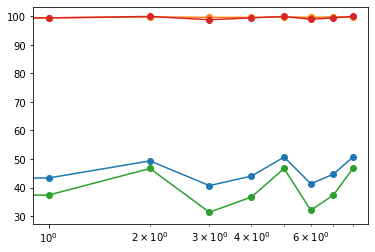

In [73]:
plt.semilogx(X_names, accuracy_X,"o-")
plt.semilogx(X_names, accuracy_X_train,"o-")
plt.semilogx(X_names, accuracy_X_ln,"o-")
plt.semilogx(X_names, accuracy_X_ln_train,"o-")

In [70]:
#Perceptron with cross validation
import warnings
warnings.filterwarnings('ignore')
accuracy_X, accuracy_X_ln ,recall_X, recall_X_ln, precision_X, precision_X_ln, accuracy_X_train, accuracy_X_ln_train, recall_X_train,recall_X_ln_train, precision_X_train, precision_X_ln_train = [], [], [], [], [], [], [], [], [],[], [], []

for X in X_range:
    kf = KFold(n_splits=10, shuffle=True, random_state=42)
    kf.split(X)

    # Initialize the accuracy of the models to blank list. The accuracy of each model will be appended to this list

    accuracy_model, precision_model, recall_model, accuracy_model_train, precision_model_train, recall_model_train = [], [], [], [],[], []
    for train_index, test_index in kf.split(X):
        # Split train-test
        X_train, X_test = X.iloc[train_index], X.iloc[test_index]
        y_train, y_test = y[train_index], y[test_index]
        # Train the model
        model = create_nb(X_train, y_train, alpha)
        # Append to accuracy_model the accuracy of the model
        accuracy_model.append(accuracy_score(y_test, model.predict(X_test), normalize=True) * 100)
        precision_model.append(precision_score(y_test, model.predict(X_test), average="macro") * 100)
        recall_model.append(recall_score(y_test, model.predict(X_test), average="macro") * 100)
        accuracy_model_train.append(accuracy_score(y_train, model.predict(X_train), normalize=True) * 100)
        precision_model_train.append(precision_score(y_train, model.predict(X_train), average="macro") * 100)
        recall_model_train.append(recall_score(y_train, model.predict(X_train), average="macro") * 100)
    accuracy_X.append(np.mean(accuracy_model))
    precision_X.append(np.mean(precision_model))
    recall_X.append(np.mean(recall_model))
    accuracy_X_train.append(np.mean(accuracy_model_train))
    precision_X_train.append(np.mean(precision_model_train))
    recall_X_train.append(np.mean(recall_model_train))



for X in X_range_ln:
    kf = KFold(n_splits=10, shuffle=True, random_state=42)
    kf.split(X)

    # Initialize the accuracy of the models to blank list. The accuracy of each model will be appended to this list
    accuracy_model, precision_model, recall_model, accuracy_model_train, precision_model_train, recall_model_train = [], [], [], [],[], []

    for train_index, test_index in kf.split(X):
        # Split train-test
        X_train, X_test = X.iloc[train_index], X.iloc[test_index]
        y_train, y_test = y[train_index], y[test_index]
        # Train the model
        model = create_nb(X_train, y_train, alpha)
        # Append to accuracy_model the accuracy of the model
        accuracy_model.append(accuracy_score(y_test, model.predict(X_test), normalize=True) * 100)
        precision_model.append(precision_score(y_test, model.predict(X_test), average="macro") * 100)
        recall_model.append(recall_score(y_test, model.predict(X_test), average="macro") * 100)
        accuracy_model_train.append(accuracy_score(y_train, model.predict(X_train), normalize=True) * 100)
        precision_model_train.append(precision_score(y_train, model.predict(X_train), average="macro") * 100)
        recall_model_train.append(recall_score(y_train, model.predict(X_train), average="macro") * 100)
    accuracy_X_ln.append(np.mean(accuracy_model))
    precision_X_ln.append(np.mean(precision_model))
    recall_X_ln.append(np.mean(recall_model))
    accuracy_X_ln_train.append(np.mean(accuracy_model_train))
    precision_X_ln_train.append(np.mean(precision_model_train))
    recall_X_ln_train.append(np.mean(recall_model_train))

NB_CV_Accuracy_matrix = {'Scenario': X_names, "Basic test": accuracy_X, "Basic train": accuracy_X_train, "LN test": accuracy_X_ln, "LN train": accuracy_X_ln_train}
NB_CV_Recall_matrix = {'Scenario': X_names, "Basic test": recall_X, "Basic train": recall_X_train, "LN test": recall_X_ln, "LN train": recall_X_ln_train}
NB_CV_Precision_matrix = {'Scenario': X_names, "Basic test": precision_X, "Basic train": precision_X_train, "LN test": precision_X_ln, "LN train": precision_X_ln_train}
pd.DataFrame(NB_CV_Accuracy_matrix).to_csv("Naive_Bayes_CV_accuracy.csv")
pd.DataFrame(NB_CV_Precision_matrix).to_csv("Naive_Bayes_CV_precision.csv")
pd.DataFrame(NB_CV_Recall_matrix).to_csv("Naive_Bayes_CV_recall.csv")

print(pd.DataFrame(NB_CV_Accuracy_matrix).to_latex())
print(pd.DataFrame(NB_CV_Recall_matrix).to_latex())
print(pd.DataFrame(NB_CV_Precision_matrix).to_latex())

\begin{tabular}{llrrrr}
\toprule
{} &   Scenario &  Basic test &  Basic train &    LN test &    LN train \\
\midrule
0 &      10000 &   51.600000 &    99.644444 &  41.866667 &   98.844444 \\
1 &       8000 &   56.000000 &    99.851852 &  48.266667 &   99.777778 \\
2 &       6000 &   59.333333 &    99.851852 &  56.266667 &  100.000000 \\
3 &   50:10000 &   53.200000 &    99.748148 &  42.133333 &   99.051852 \\
4 &    50:8000 &   56.400000 &    99.851852 &  48.400000 &   99.837037 \\
5 &    50:6000 &   60.133333 &    99.851852 &  56.266667 &  100.000000 \\
6 &  100:10000 &   53.733333 &    99.792593 &  43.066667 &   99.259259 \\
7 &   100:8000 &   56.533333 &    99.896296 &  49.733333 &   99.896296 \\
8 &   100:6000 &   60.400000 &    99.851852 &  56.533333 &  100.000000 \\
\bottomrule
\end{tabular}

\begin{tabular}{llrrrr}
\toprule
{} &   Scenario &  Basic test &  Basic train &    LN test &    LN train \\
\midrule
0 &      10000 &   49.073488 &    99.546685 &  40.140070 &   98.206222 \\

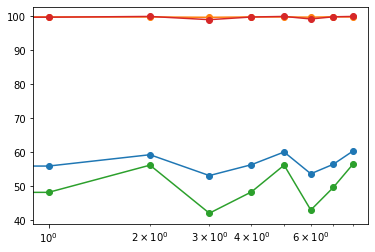

In [71]:
plt.semilogx(X_names, accuracy_X,"o-")
plt.semilogx(X_names, accuracy_X_train,"o-")
plt.semilogx(X_names, accuracy_X_ln,"o-")
plt.semilogx(X_names, accuracy_X_ln_train,"o-")

In [68]:
#Learning rate
import warnings
warnings.filterwarnings('ignore')
accuracy_X, accuracy_X_ln ,recall_X, recall_X_ln, precision_X, precision_X_ln, accuracy_X_train, accuracy_X_ln_train, recall_X_train,recall_X_ln_train, precision_X_train, precision_X_ln_train = [], [], [], [], [], [], [], [], [],[], [], []

alpha_range=[1e-3, 1e-2, 1e-1, 0.5, 1, 10, 100, 1000]
X = dataset.iloc[:,100:6000]

kf = KFold(n_splits=10, shuffle=True, random_state=42)
kf.split(X)

for alpha in alpha_range:
# Initialize the accuracy of the models to blank list. The accuracy of each model will be appended to this list

    accuracy_model, precision_model, recall_model, accuracy_model_train, precision_model_train, recall_model_train = [], [], [], [],[], []
    for train_index, test_index in kf.split(X):
        # Split train-test
        X_train, X_test = X.iloc[train_index], X.iloc[test_index]
        y_train, y_test = y[train_index], y[test_index]
        # Train the model
        model = create_nb(X_train, y_train, alpha)
        # Append to accuracy_model the accuracy of the model
        accuracy_model.append(accuracy_score(y_test, model.predict(X_test), normalize=True) * 100)
        precision_model.append(precision_score(y_test, model.predict(X_test), average="macro") * 100)
        recall_model.append(recall_score(y_test, model.predict(X_test), average="macro") * 100)
        accuracy_model_train.append(accuracy_score(y_train, model.predict(X_train), normalize=True) * 100)
        precision_model_train.append(precision_score(y_train, model.predict(X_train), average="macro") * 100)
        recall_model_train.append(recall_score(y_train, model.predict(X_train), average="macro") * 100)
    accuracy_X.append(np.mean(accuracy_model))
    precision_X.append(np.mean(precision_model))
    recall_X.append(np.mean(recall_model))
    accuracy_X_train.append(np.mean(accuracy_model_train))
    precision_X_train.append(np.mean(precision_model_train))
    recall_X_train.append(np.mean(recall_model_train))
    
NB_Alpha_Accuracy_matrix = {'Scenario': alpha_range, "Basic test": accuracy_X, "Basic train": accuracy_X_train}
NB_Alpha_Recall_matrix = {'Scenario': alpha_range, "Basic test": recall_X, "Basic train": recall_X_train}
NB_Alpha_Precision_matrix = {'Scenario': alpha_range, "Basic test": precision_X, "Basic train": precision_X_train}
pd.DataFrame(NB_Alpha_Accuracy_matrix).to_csv("Naive_Bayes_CV_alpha_accuracy.csv")
pd.DataFrame(NB_Alpha_Precision_matrix).to_csv("Naive_Bayes_Perceptron_CV_alpha_precision.csv")
pd.DataFrame(NB_Alpha_Recall_matrix).to_csv("Naive_Bayes_CV_alpha_recall.csv")

print(pd.DataFrame(NB_Alpha_Accuracy_matrix).to_latex())
print(pd.DataFrame(NB_Alpha_Recall_matrix).to_latex())
print(pd.DataFrame(NB_Alpha_Precision_matrix).to_latex())

\begin{tabular}{lrrr}
\toprule
{} &  Scenario &  Basic test &  Basic train \\
\midrule
0 &     0.001 &        60.4 &    99.851852 \\
1 &     0.010 &        60.4 &    99.851852 \\
2 &     0.100 &        60.4 &    99.851852 \\
3 &     0.500 &        60.4 &    99.851852 \\
4 &     1.000 &        60.4 &    99.851852 \\
5 &    10.000 &        60.4 &    99.851852 \\
6 &   100.000 &        60.4 &    99.851852 \\
7 &  1000.000 &        60.4 &    99.851852 \\
\bottomrule
\end{tabular}

\begin{tabular}{lrrr}
\toprule
{} &  Scenario &  Basic test &  Basic train \\
\midrule
0 &     0.001 &   56.086459 &    99.860509 \\
1 &     0.010 &   56.086459 &    99.860509 \\
2 &     0.100 &   56.086459 &    99.860509 \\
3 &     0.500 &   56.086459 &    99.860509 \\
4 &     1.000 &   56.086459 &    99.860509 \\
5 &    10.000 &   56.086459 &    99.860509 \\
6 &   100.000 &   56.086459 &    99.860509 \\
7 &  1000.000 &   56.086459 &    99.860509 \\
\bottomrule
\end{tabular}

\begin{tabular}{lrrr}
\toprule
{} & 

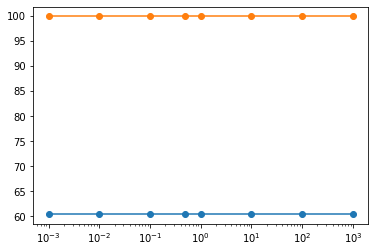

In [69]:
plt.semilogx(alpha_range, accuracy_X,"o-")
plt.semilogx(alpha_range, accuracy_X_train,"o-")

In [105]:
X= dataset.iloc[:,100:6000]
alpha=0.0005
model = create_nb(X, dataset["Class"], alpha)
# Append to accuracy_model the accuracy of the model
accuracy_model=(accuracy_score(validation_set["Class"], model.predict(validation_set.iloc[:,100:6000]), normalize=True) * 100)
precision_model=(precision_score(validation_set["Class"], model.predict(validation_set.iloc[:,100:6000]), average="macro") * 100)
recall_model=(recall_score(validation_set["Class"], model.predict(validation_set.iloc[:,100:6000]), average="macro") * 100)

print("Accuracy is", accuracy_model, "precision is:", precision_model, "Recall is:", recall_model)


Accuracy is 54.666666666666664 precision is: 50.45454545454545 Recall is: 54.58333333333333
